In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import numpy as np
import os

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)
os.makedirs(IMAGES_PATH, exist_ok=True)

./images/end_to_end_project


In [6]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [7]:
import os
import tarfile
import urllib.request

In [8]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [9]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) # Décompresser -> extractall
    housing_tgz.close() # C'est bien de le fermer avec "nom_variable.close"

In [10]:
fetch_housing_data()

In [11]:
import pandas as pd

In [12]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [13]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure attribute_histogram_plots


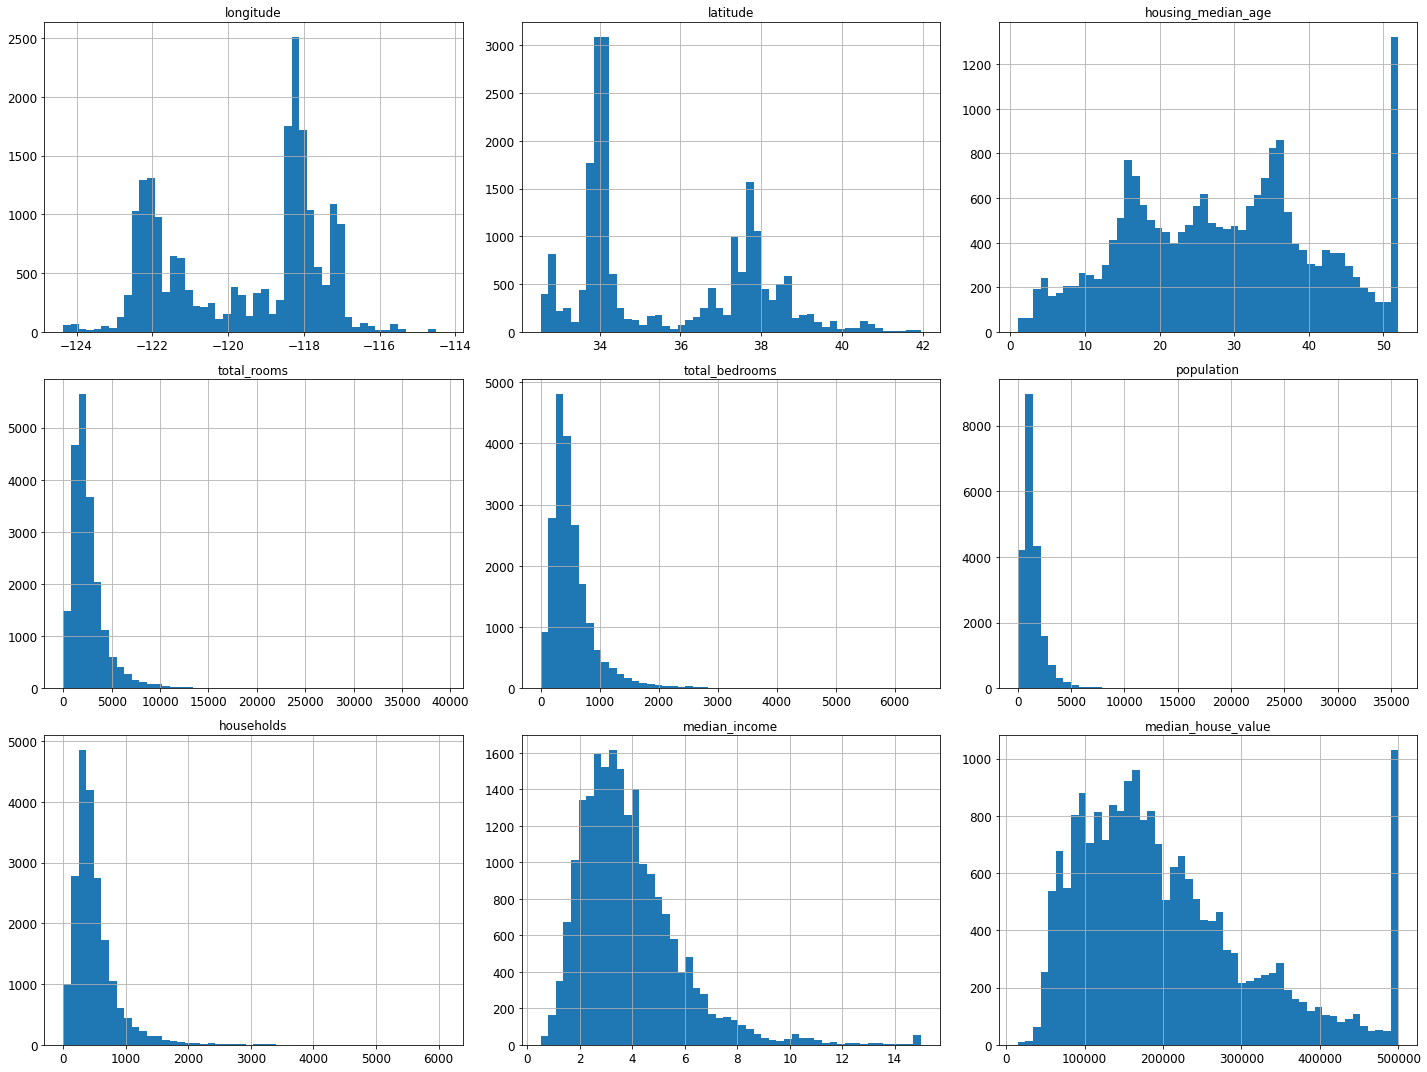

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [18]:
# to make this notebook's output identical at every
np.random.seed(42)

In [19]:
import numpy as np

In [20]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Il permute, il créer une liste de 0 à len(housing), puis il permute
    test_set_size = int(len(data) * test_ratio) # Calcule le pourcentage
    test_indices = shuffled_indices[:test_set_size] # Sélection de 20% des indices
    train_indices = shuffled_indices[test_set_size:] # Séléction de 80% des indices
    return data.iloc[train_indices], data.iloc[test_indices] # Découper les données particulières

In [21]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [22]:
len(test_set)

4128

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)

In [24]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

In [26]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

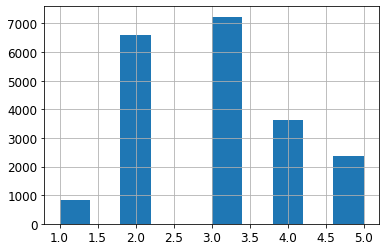

In [28]:
housing["income_cat"].hist()

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

Saving figure bad_visualization_plot


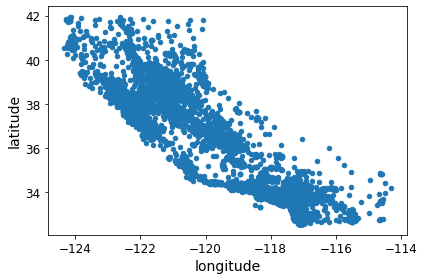

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


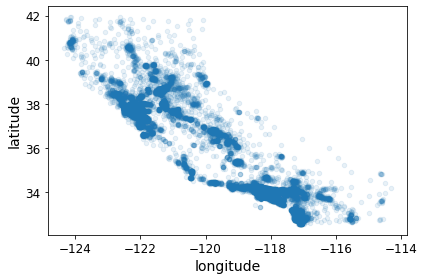

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure housing_prices_scatterplot


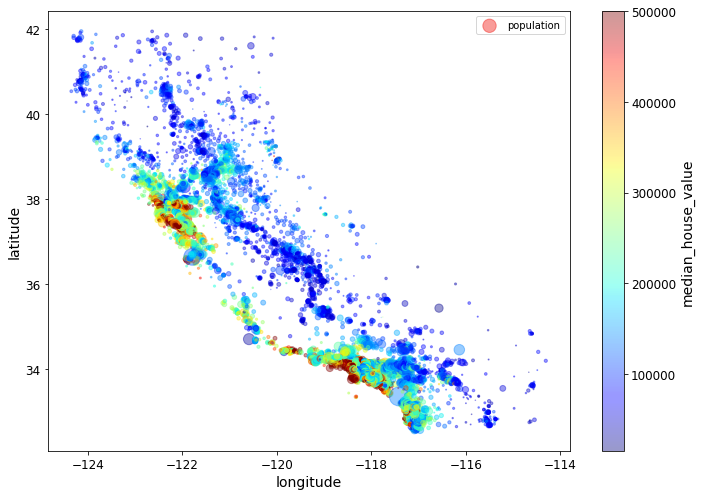

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [32]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7ff1fb084cd0>)

Saving figure california_housing_prices_plot


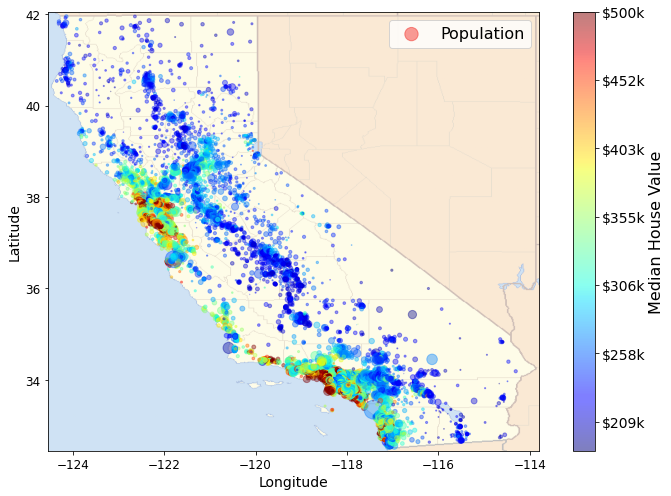

In [33]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
                  s=housing["population"]/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Corellations

In [34]:
corr_matrix = housing.corr()

In [35]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

/home/administrateur/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Saving figure scatter_matrix_plot


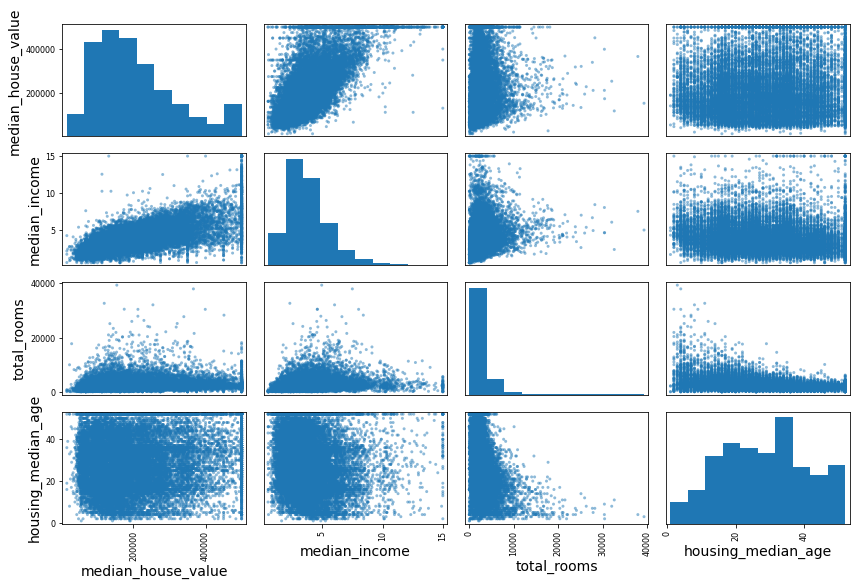

In [37]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


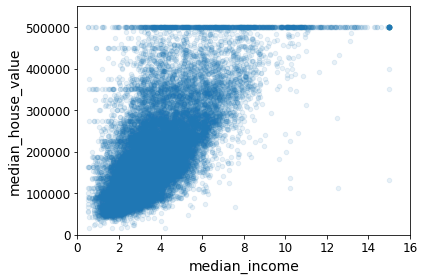

In [38]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [39]:
# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# housing["population_per_household"]=housing["population"]/housing["households"]

In [40]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [41]:
"""
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()
"""

'\nhousing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",\n             alpha=0.2)\nplt.axis([0, 5, 0, 520000])\nplt.show()\n'

In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning

In [43]:
housing = train_set.copy().drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"]

In [44]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,INLAND
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN


In [45]:
housing.dropna(subset=["total_bedrooms"])
# option 1
housing.drop("total_bedrooms", axis=1)
# option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [47]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  434.    , 1166.    ,
        409.5   ,    3.5485])

In [50]:
X = imputer.transform(housing_num)

In [51]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [52]:
housing_cat = housing[["ocean_proximity"]]

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
ordinal_encoder = OrdinalEncoder()

In [55]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [56]:
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
cat_encoder = OneHotEncoder()

In [60]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [61]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # ni *args ni **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # rien d’autre à faire
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [64]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,<1H OCEAN


In [65]:
housing['total_rooms'] / housing['households']

12069    7.723077
15925    5.326622
11162    4.668478
4904     3.383495
4683     4.119792
           ...   
13123    6.000000
19648    5.349282
9845     3.641221
10799    4.540598
2732     3.929530
Length: 16512, dtype: float64

In [66]:
housing['population'] / housing['households']

12069    3.507692
15925    3.322148
11162    2.777174
4904     3.635922
4683     1.970486
           ...   
13123    3.251142
19648    3.095694
9845     1.791349
10799    2.247863
2732     3.436242
Length: 16512, dtype: float64

In [67]:
moyenne_pop = housing['population'].mean()

In [68]:
std_pop = housing['population'].std() # std c'est écrat_type

In [69]:
print(moyenne_pop, std_pop)

1425.437742248062 1143.062756115167


In [70]:
(housing['population'] - moyenne_pop) / std_pop

12069   -1.047570
15925    0.052108
11162   -0.352945
4904    -0.591777
4683    -0.254087
           ...   
13123   -0.624146
19648   -0.681011
9845    -0.631144
10799   -0.326699
2732    -0.351195
Name: population, Length: 16512, dtype: float64

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [71]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
] # get the column indices

In [72]:
rooms_ix, bedrooms_ix

(3, 4)

In [73]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND


Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [74]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND,7.723077,3.507692
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,NEAR BAY,5.326622,3.322148
11162,-118.0,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN,4.668478,2.777174
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,<1H OCEAN,3.383495,3.635922
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,<1H OCEAN,4.119792,1.970486


In [75]:
housing_extra_attribs.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'],
      dtype='object')

## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [77]:
housing_num.shape, housing_num_tr.shape

((16512, 8), (16512, 11))

In [78]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765
...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135
9845,-121.90,36.58,31.0,1431.0,434.0,704.0,393.0,3.1977
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315


In [79]:
housing_num_tr[:3]

array([[ 1.00389865, -0.8400624 , -1.79507596, -0.97773624, -1.09568908,
        -1.04760128, -1.1356496 ,  0.19001247,  0.90771428,  0.07408222,
        -0.97458529],
       [-1.43477229,  0.98536392,  1.85553889, -0.11850059, -0.10619766,
         0.05210918, -0.13688171,  0.26931072, -0.04200187,  0.04527606,
        -0.10414183],
       [ 0.77948108, -0.8400624 , -0.20785212, -0.42167953, -0.36070627,
        -0.35295521, -0.34343319,  0.02989505, -0.30282448, -0.03933216,
         0.17100692]])

In [80]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [81]:
housing_prepared

array([[ 1.00389865, -0.8400624 , -1.79507596, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43477229,  0.98536392,  1.85553889, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77948108, -0.8400624 , -0.20785212, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81439048, -0.93835459,  0.42703742, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.99632302, -1.32216217, -1.08082523, ...,  0.        ,
         0.        ,  0.        ]])

In [82]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [84]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [85]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

In [86]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 1.00389865, -0.8400624 , -1.79507596, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43477229,  0.98536392,  1.85553889, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77948108, -0.8400624 , -0.20785212, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81439048, -0.93835459,  0.42703742, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.99632302, -1.32216217, -1.08082523, ...,  0.        ,
         0.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [87]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [89]:
housing_prepared.shape, housing_labels.shape

((16512, 16), (16512,))

In [90]:
housing_prepared[0]

array([ 1.00389865, -0.8400624 , -1.79507596, -0.97773624, -1.09568908,
       -1.04760128, -1.1356496 ,  0.19001247,  0.90771428,  0.07408222,
       -0.97458529,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [91]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [151097.03591122 273442.53120163 220317.67746605 136097.64525697
 247844.26584703]


In [92]:
lin_reg.coef_

array([-56526.90190901, -57269.07333867,  13498.20751955,   -486.61458985,
         6595.89487204, -46609.44323095,  45277.67024291,  75079.73291373,
         6363.11820304,   1893.31787425,   9550.29003697, -24427.07135396,
       -60465.84081689, 133211.87961876, -28949.5803842 , -19369.3870637 ])

In [93]:
print("Labels:", list(some_labels))

Labels: [500001.0, 270000.0, 196100.0, 118800.0, 225000.0]


In [94]:
some_data_prepared

array([[ 1.00389865, -0.8400624 , -1.79507596, -0.97773624, -1.09568908,
        -1.04760128, -1.1356496 ,  0.19001247,  0.90771428,  0.07408222,
        -0.97458529,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.43477229,  0.98536392,  1.85553889, -0.11850059, -0.10619766,
         0.05210918, -0.13688171,  0.26931072, -0.04200187,  0.04527606,
        -0.10414183,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.77948108, -0.8400624 , -0.20785212, -0.42167953, -0.36070627,
        -0.35295521, -0.34343319,  0.02989505, -0.30282448, -0.03933216,
         0.17100692,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.64981759, -0.75581196,  0.74448219, -0.88856596, -0.78171584,
        -0.59179448, -0.76699444, -1.26447048, -0.81206385,  0.09399018,
         1.34213589,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.59994702, -0.72304789,  1

In [95]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68279.53619237088

In [96]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49414.827093602726